<a href="https://colab.research.google.com/github/MinaMofreh/Poice-Data-Analysis-Project/blob/main/Police_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poice Data Analysis Project
In this notebook, we will analyze a dataset of police traffic stops to extract insights and visualize key patterns.

## 1. Importing Libraries and Loading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/police.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
from google.colab import drive
drive.mount('/content/police.csv')

## 2. Data Preprocessing
We will clean and prepare the data for analysis by:
- Dropping columns that have too many missing values or are not useful.
- Handling missing values.

In [3]:
# Check for missing vlues

print(data.isnull().sum())

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


In [ ]:
# Convert 'stop_date' into datetime format
data["stop_date"] = pd.to_datetime(data["stop_date"])

data.drop(columns=["county_name", "search_type"], inplace = True )
# Fill missing values using the mode for categorical columns
columns_mode = ["driver_gender", "driver_race", "violation_raw", "violation", "stop_outcome", "is_arrested", "stop_duration"]
for col in columns_mode:
    data[col].fillna(data[col].mode()[0], inplace = True)

# Fill missing values using the median for numerical columns
columns_median = ["driver_age_raw", "driver_age"]
for col in columns_median:
    data[col].fillna(data[col].median(), inplace = True)

# Print the count of null values in each column
print(data.isnull().sum())

C:\Users\mm317\AppData\Local\Temp\ipykernel_8344\3669859033.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace = True)
C:\Users\mm317\AppData\Local\Temp\ipykernel_8344\3669859033.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col].fillna(data[col].mode()[

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64


## 3. Exploratory Data Analysis (EDA)
We'll explore the data through visualizations to answer key questions.

### Q.1: What are the most common violations by driver demographics (gender and race)?
- Purpose: Understand if certain groups are more likely to be stopped for specific violations.
- Visualization: Stacked bar chart showing violation types by gender, race, and age groups.

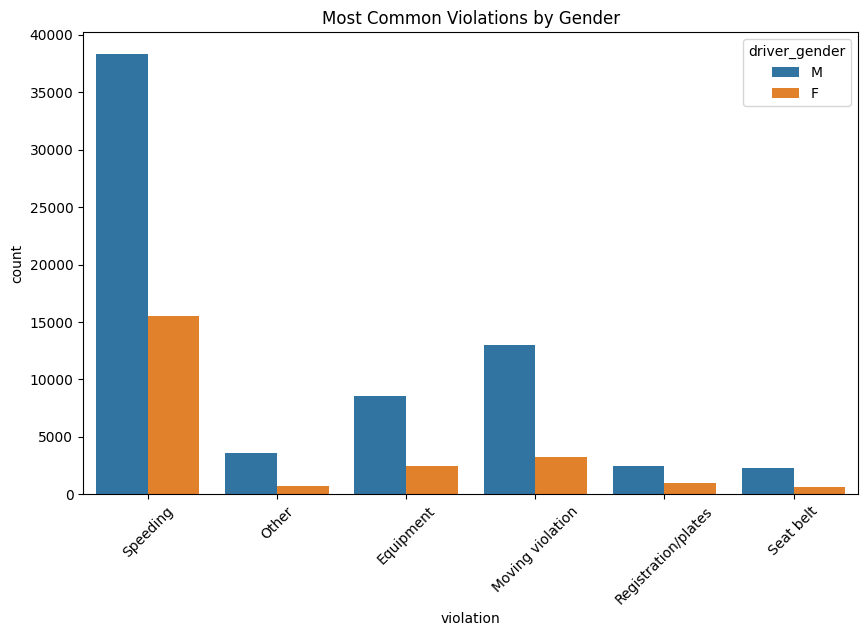

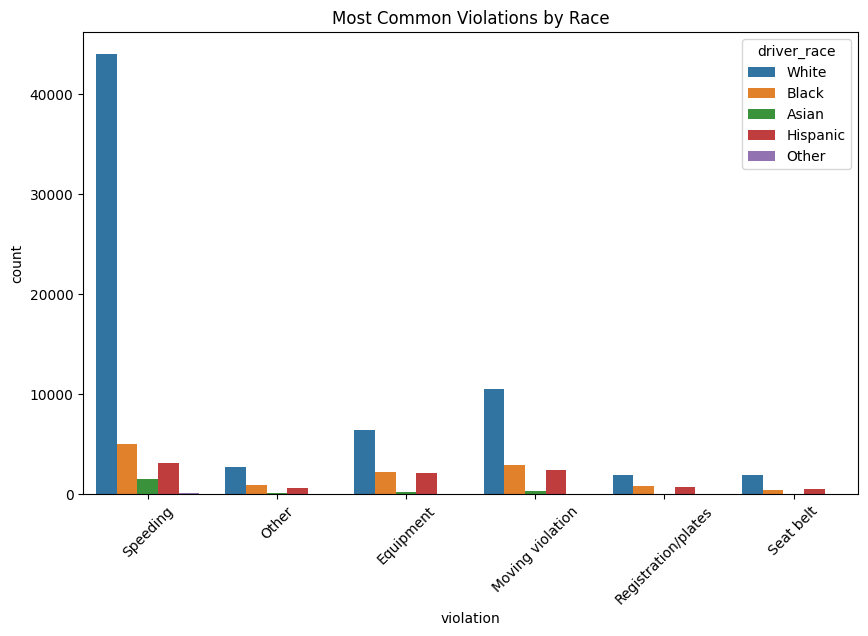

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='violation', hue='driver_gender')
plt.title('Most Common Violations by Gender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='violation', hue='driver_race')
plt.title('Most Common Violations by Race')
plt.xticks(rotation=45)
plt.show()

### Q.2: Are there any differences in search rates based on the driver's race or gender?

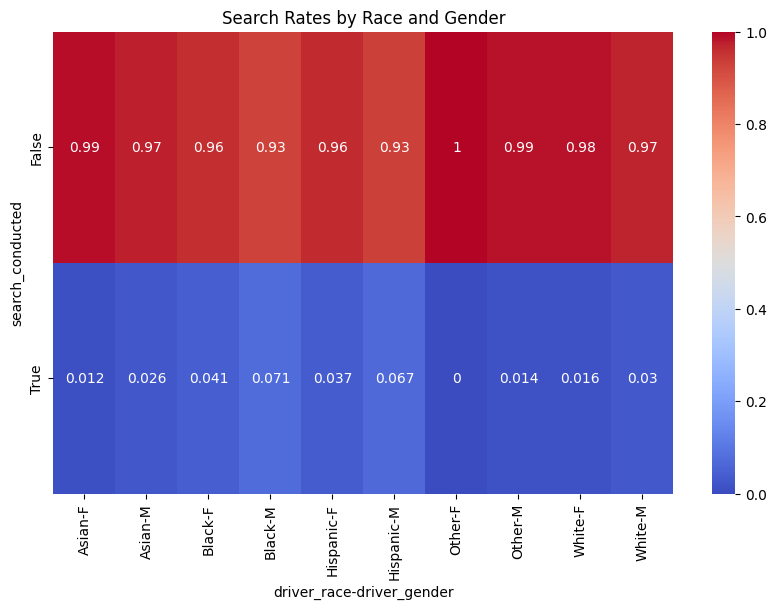

In [ ]:
# Heatmap of search rates by race and gender
search_race_gender = pd.crosstab(data['search_conducted'], [data['driver_race'], data['driver_gender']], normalize='columns')
plt.figure(figsize=(10,6))
sns.heatmap(search_race_gender, annot=True, cmap='coolwarm')
plt.title('Search Rates by Race and Gender')
plt.show()


### Q.3: What percentage of stops lead to searches, and what types of searches are most common?
- Purpose: Investigate how frequently searches are conducted and the primary reasons.
- Visualization: Pie chart showing the breakdown of search types.

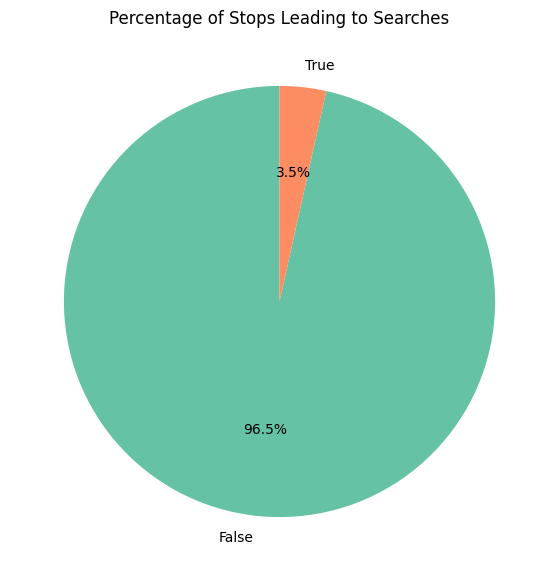

In [ ]:
# Pie chart showing the percentage of stops leading to searches
search_counts = data['search_conducted'].value_counts(normalize=True)
plt.figure(figsize=(7,7))
plt.pie(search_counts, labels=search_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Percentage of Stops Leading to Searches')
plt.show()


### Q.4: What is the relationship between the type of violation and whether a search was conducted?

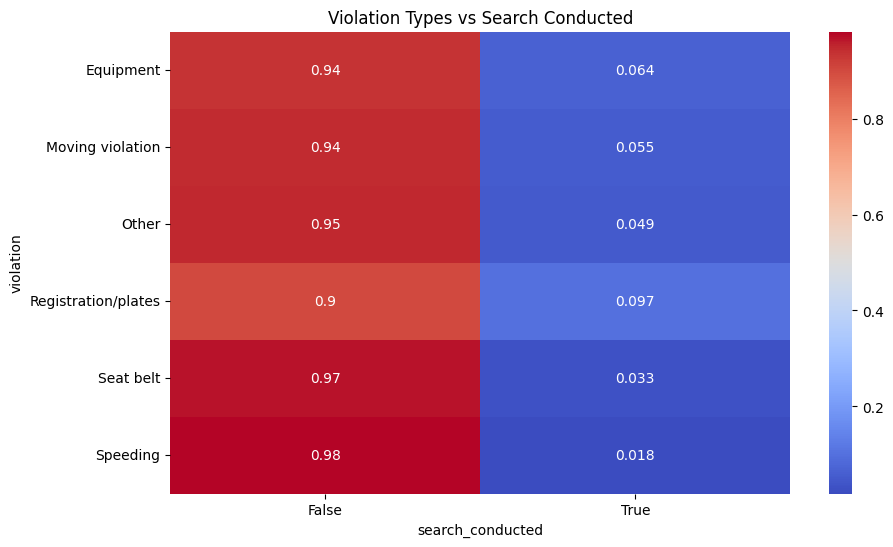

In [ ]:
# Heatmap showing violation types vs search conducted
violation_search = pd.crosstab(data['violation'], data['search_conducted'], normalize='index')
plt.figure(figsize=(10,6))
sns.heatmap(violation_search, annot=True, cmap='coolwarm')
plt.title('Violation Types vs Search Conducted')
plt.show()


### Q.5: How often do searches result in arrests, and does this differ based on the reason for the stop?
- Purpose: Evaluate the effectiveness of searches in leading to arrests.
- Visualization: Funnel chart showing percentage of stops that lead to searches, and searches that lead to arrests.

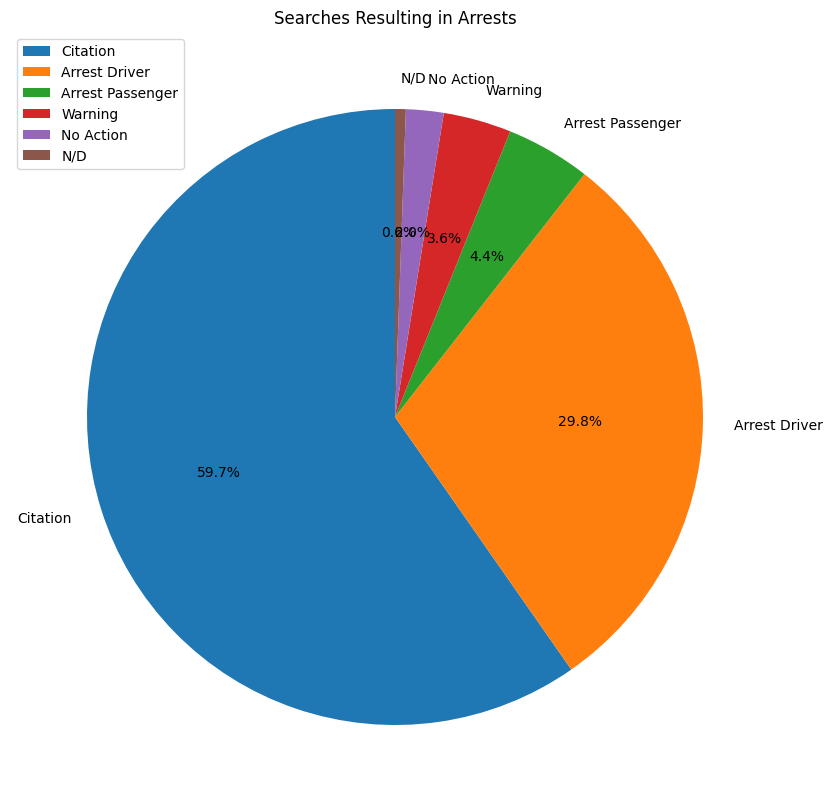

In [ ]:
# Pie chart showing searches leading to arrests
search_arrest = data[data['search_conducted'] == True]['stop_outcome'].value_counts(normalize=True)
plt.figure(figsize=(10,10))
plt.pie(search_arrest, labels=search_arrest.index, autopct='%1.1f%%', startangle=90)
plt.title('Searches Resulting in Arrests')
plt.legend()
plt.show()


### Q.6: What are the most common outcomes of traffic stops (e.g., citation, arrest) across different violation types?

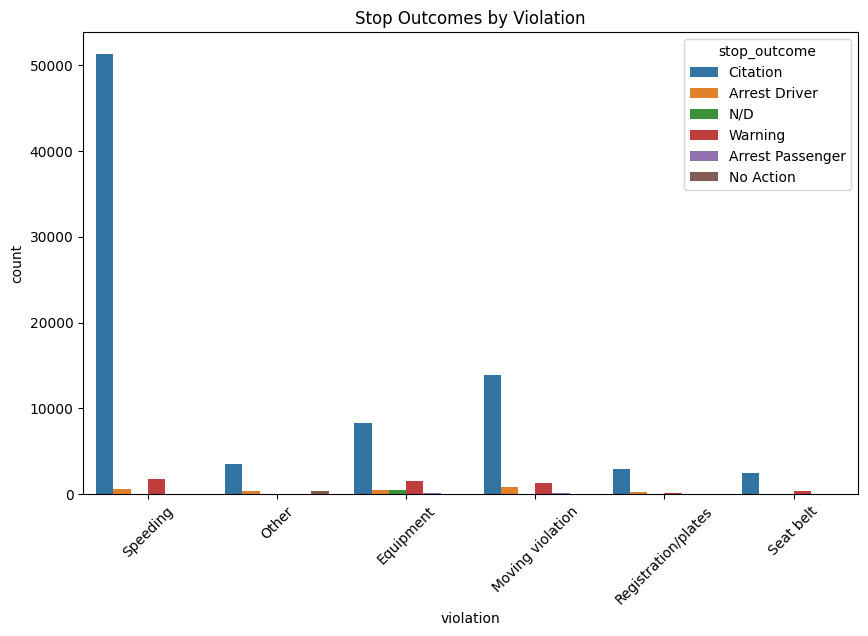

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='violation', hue='stop_outcome')
plt.title('Stop Outcomes by Violation')
plt.xticks(rotation=45)
plt.show()

### Q.7: Is there a relationship between stop duration and the outcome (e.g., citation vs. arrest)?
- Purpose: Explore whether longer stops tend to result in arrests or more serious outcomes.
- Visualization: Box plot or scatter plot showing stop duration vs. stop outcome.

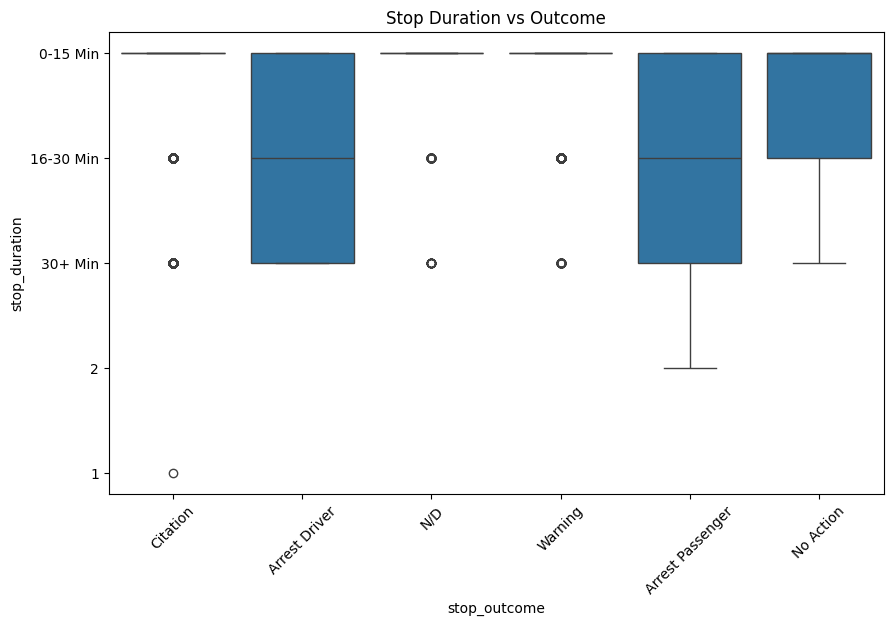

In [ ]:
# Box plot for stop duration vs stop outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='stop_outcome', y='stop_duration', data=data)
plt.title('Stop Duration vs Outcome')
plt.xticks(rotation=45)
plt.show()


### Q.8: What percentage of searches lead to finding illegal items, and does this vary based on driver demographics or violation type?
- Purpose: Assess how effective searches are and whether there are demographic disparities.
- Visualization: Bar chart comparing search success rates across demographics and violations.

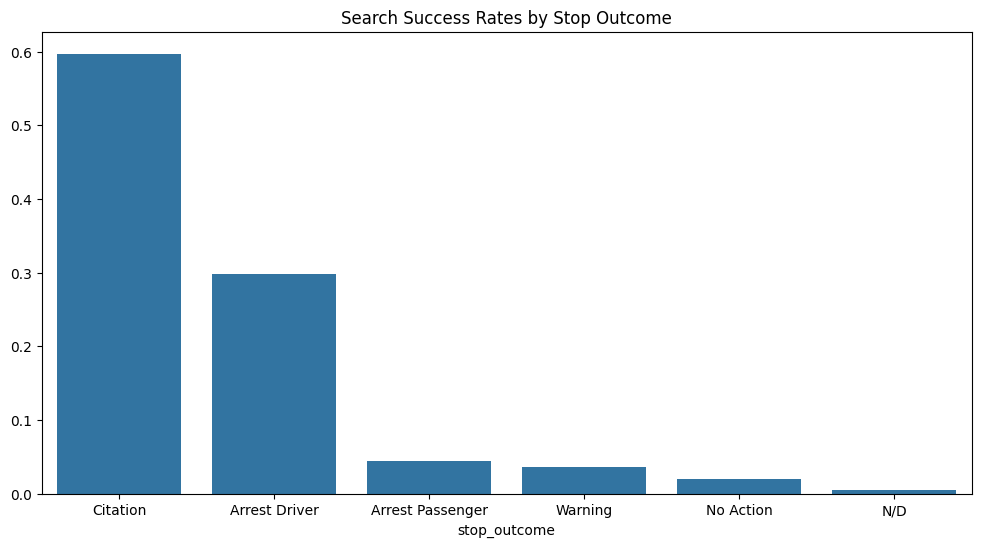

In [ ]:
# Search success rates by violation and demographic
search_success = data[data['search_conducted'] == True]['stop_outcome'].value_counts(normalize=True)
plt.figure(figsize=(12,6))
sns.barplot(x=search_success.index, y=search_success.values)
plt.title('Search Success Rates by Stop Outcome')
plt.show()


## Summary Insights
- Demographic Disparities: There may be notable differences in how races and genders are treated during traffic stops, with potential disparities in searches and arrests.
- Search Effectiveness: Many searches may not result in arrests or finding illegal items, raising questions about the necessity or effectiveness of search practices.
- Temporal Trends: Traffic stops are more frequent at certain times (e.g., weekends, nights), and violations may follow seasonal patterns.
- Violation Outcomes: Certain violations, like drug-related offenses, are more likely to lead to searches and arrests, while others (e.g., speeding) result mainly in citations or warnings.